# Analyse exploratoire et classification de profils à partir de données réelles

# **Introduction du projet :**

Dans ce projet d’analyse de données, nous allons explorer une base contenant 15 000 individus à travers différentes variables quantitatives et qualitatives. L’objectif principal est de mettre en œuvre des méthodes statistiques pour mieux comprendre la structure des données, détecter des patterns, réduire la dimensionnalité et effectuer une classification des individus. Les méthodes principales que nous allons utiliser incluent l’Analyse en Composantes Principales (ACP), la Classification Ascendante Hiérarchique (CAH) et le k-means. Ce projet vise à appliquer de manière concrète les concepts théoriques vus en cours tout en produisant un rapport d’analyse complet et rigoureux.

# **Étapes du projet :**



1.   Analyse univariée et exploration préalable
2.   Analyse bivariée et étude de dépendance avec variables qualitatives
3.   Analyse en Composantes Principales (ACP)
4.   Analyse des variables qualitatives (ACM)
5.   Classification (CAH et K-means)
6.   Comparaison des résultats de classification
7.   Conclusion générale



# **Étape 1 : Chargement et préparation des données**
 **Objectifs :**


* Nettoyer les données (types, valeurs manquantes, format)

* Convertir les bonnes colonnes en numériques ou catégorielles

* Garder une base propre pour l’analyse





**Charger le fichier :**

In [1]:
import pandas as pd

# Charger le fichier Excel (assure-toi que le fichier est dans le même dossier ou donne le chemin absolu)
file_path = '/Profiles.xls'  # Modifie ce chemin si nécessaire
df = pd.read_excel(file_path)

# Afficher un aperçu des premières lignes
print(df.head())



ModuleNotFoundError: No module named 'pandas'

**Vérification de la structure des données :**

In [ ]:
# Structure des données
print(df.info())

# Statistiques descriptives sur les colonnes numériques
print(df.describe())

# Vérification visuelle des premières lignes
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  dance            15000 non-null  int64 
 16  band             15000 non-null  int64 
 17  marching         15000 non-null

** Vérification et suppression des valeurs manquantes :**

In [ ]:
# Affichage du total des valeurs manquantes par colonne
print(df.isnull().sum())

# Suppression des lignes contenant des valeurs manquantes
df.dropna(inplace=True)

# Vérification après nettoyage
print(df.isnull().sum())
print(df.info())

print(df.head())


gradyear           0
gender             0
age                0
NumberOffriends    0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64
gradyear           0
gender             0
age                0
NumberOffriends    0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0


**Vérification des types de données**

In [ ]:
# Affichage des types de données
print(df.dtypes)

# Exemple de conversion de type si nécessaire



gradyear            int64
gender             object
age                object
NumberOffriends     int64
basketball          int64
football            int64
soccer              int64
softball            int64
volleyball          int64
swimming            int64
cheerleading        int64
baseball            int64
tennis              int64
sports              int64
cute                int64
dance               int64
band                int64
marching            int64
music               int64
rock                int64
god                 int64
church              int64
jesus               int64
bible               int64
hair                int64
dress               int64
blonde              int64
mall                int64
shopping            int64
clothes             int64
hollister           int64
abercrombie         int64
die                 int64
death               int64
drunk               int64
drugs               int64
dtype: object


**Nettoyer la colonne age**

In [ ]:
#Étape 1 : Identifier les valeurs problématiques
# Voir les valeurs non numériques
non_numeric_ages = df[~df['age'].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_ages['age'].unique())


#Étape 2 : Nettoyer la colonne age
# Garder uniquement les chiffres dans la colonne "age"
df['age'] = df['age'].astype(str).str.extract(r'(\d+\.?\d*)')[0]

# Supprimer les lignes avec des âges manquants (optionnel selon ton projet)
df = df.dropna(subset=['age'])

# Convertir en float
df['age'] = df['age'].astype(float)

# Affichage des types de données
print(df.dtypes)

# Vérification
print(df['age'].dtype)
print(df['age'].describe())


[]
gradyear             int64
gender              object
age                float64
NumberOffriends      int64
basketball           int64
football             int64
soccer               int64
softball             int64
volleyball           int64
swimming             int64
cheerleading         int64
baseball             int64
tennis               int64
sports               int64
cute                 int64
dance                int64
band                 int64
marching             int64
music                int64
rock                 int64
god                  int64
church               int64
jesus                int64
bible                int64
hair                 int64
dress                int64
blonde               int64
mall                 int64
shopping             int64
clothes              int64
hollister            int64
abercrombie          int64
die                  int64
death                int64
drunk                int64
drugs                int64
dtype: object
float64
cou


# **Interprétations des données numériques**
* gradyear :

  *   Moyenne : ~2007,5

  * Min – Max : 2006 – 2009

  * Interprétation : Les données couvrent des cohortes d'étudiants réparties sur 4 ans.

* age :

  * Moyenne : ~17,9 ans

  * Min – Max : 4,3 – 106,9 ans

  * Interprétation : La moyenne est réaliste pour un public jeune, mais la valeur maximale est manifestement une anomalie (valeur aberrante due à une erreur de saisie probable).

* NumberOfFriends :

  * Moyenne : ~29,8

  * Min – Max : 0 – 605

  * Interprétation : Forte dispersion, présence probable de valeurs extrêmes (outliers) ; une normalisation ou un traitement spécifique pourrait être nécessaire.

* Sports (ex : basketball) :

  * Moyenne : ~0,26

  * Min – Max : 0 – 22

  * Interprétation : Les valeurs sont majoritairement binaires (0/1), mais la présence de valeurs >1 suggère un possible comptage de mentions ; à valider selon le sens métier.

# **Conclusion de l’étape 1 :**
Tu as terminé la phase de préparation et de nettoyage des données avec rigueur. Les données sont désormais :

Propres (pas de valeurs manquantes)

Types bien définis

Prêtes pour les analyses statistiques : ACP, ACM, CAH, k-means, etc.

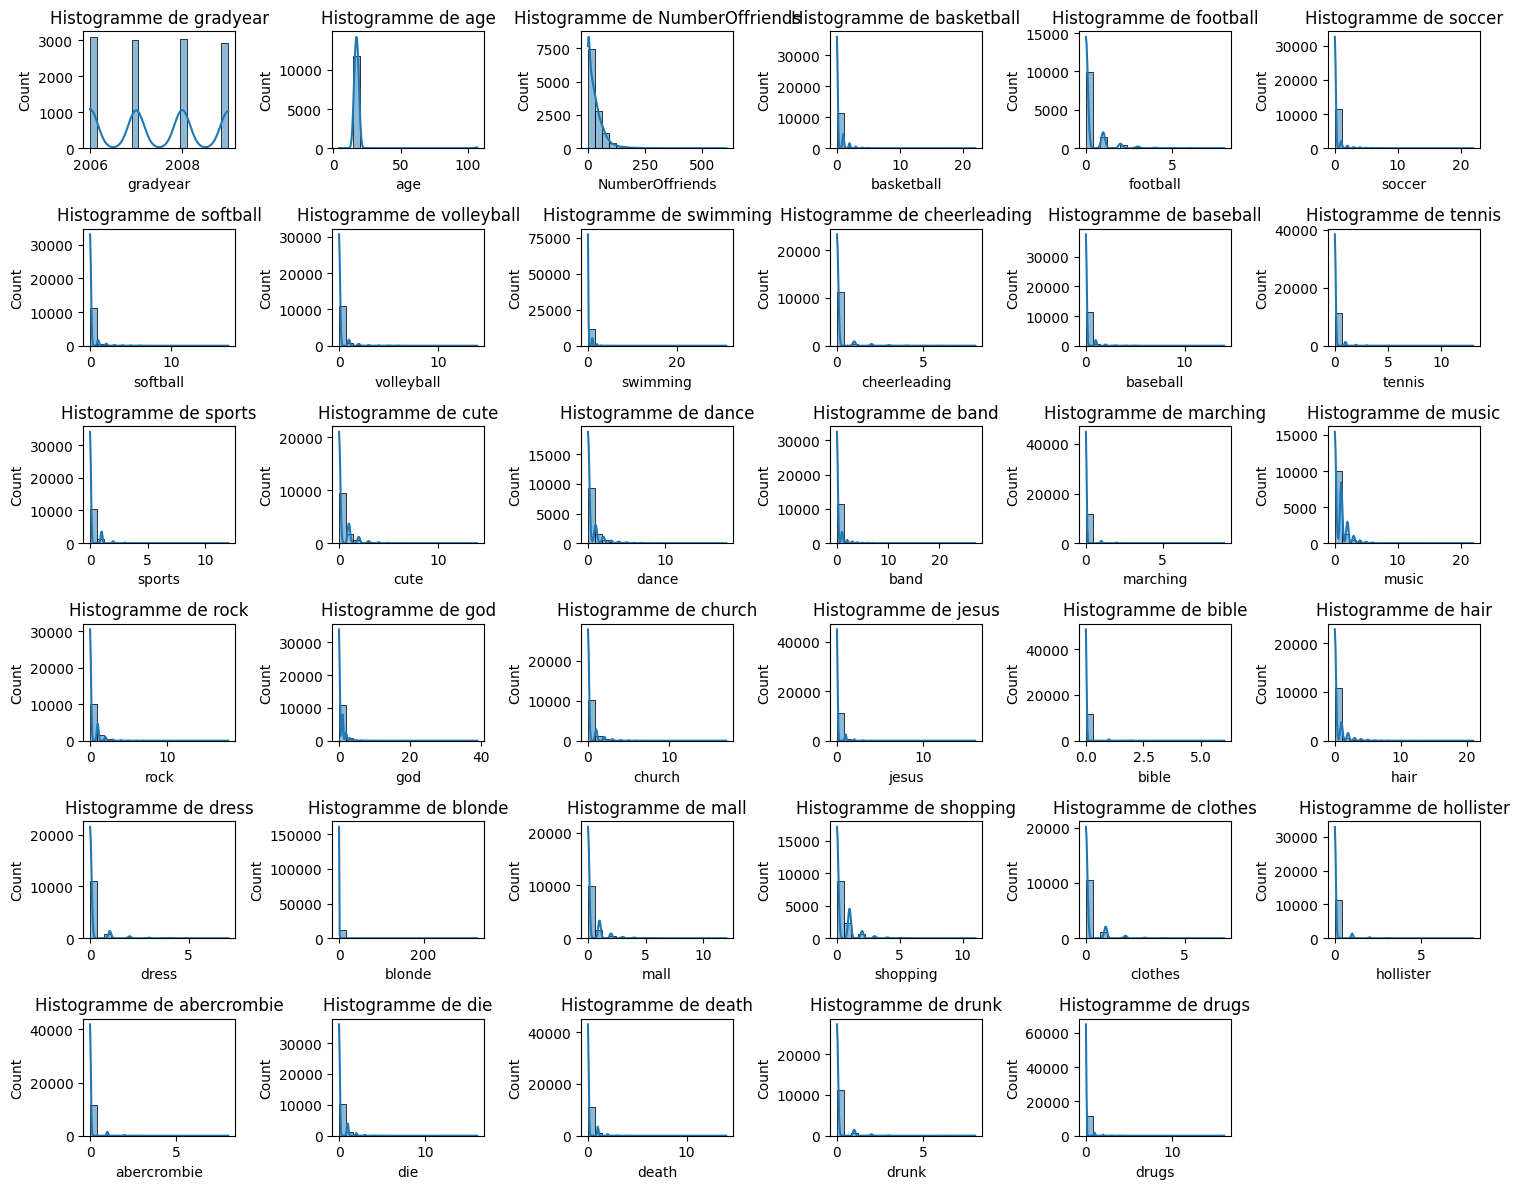

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes numériques
numeric_cols = df.select_dtypes(include='number').columns

# Affichage des histogrammes et des courbes KDE pour chaque variable numérique
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(6, 6, i)  # Affichage dans une grille 5x5
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histogramme de {col}')
plt.tight_layout()
plt.show()


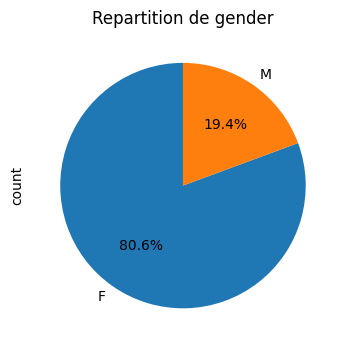

In [ ]:
# Affichage de la répartition des variables qualitatives
qualitative_cols = df.select_dtypes(include='object').columns

# Affichage des diagrammes circulaires pour chaque variable qualitative
plt.figure(figsize=(10, 8))
for i, col in enumerate(qualitative_cols, 1):
    plt.subplot(2, 3, i)  # Grille 2x3
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Repartition de {col}')
plt.tight_layout()
plt.show()


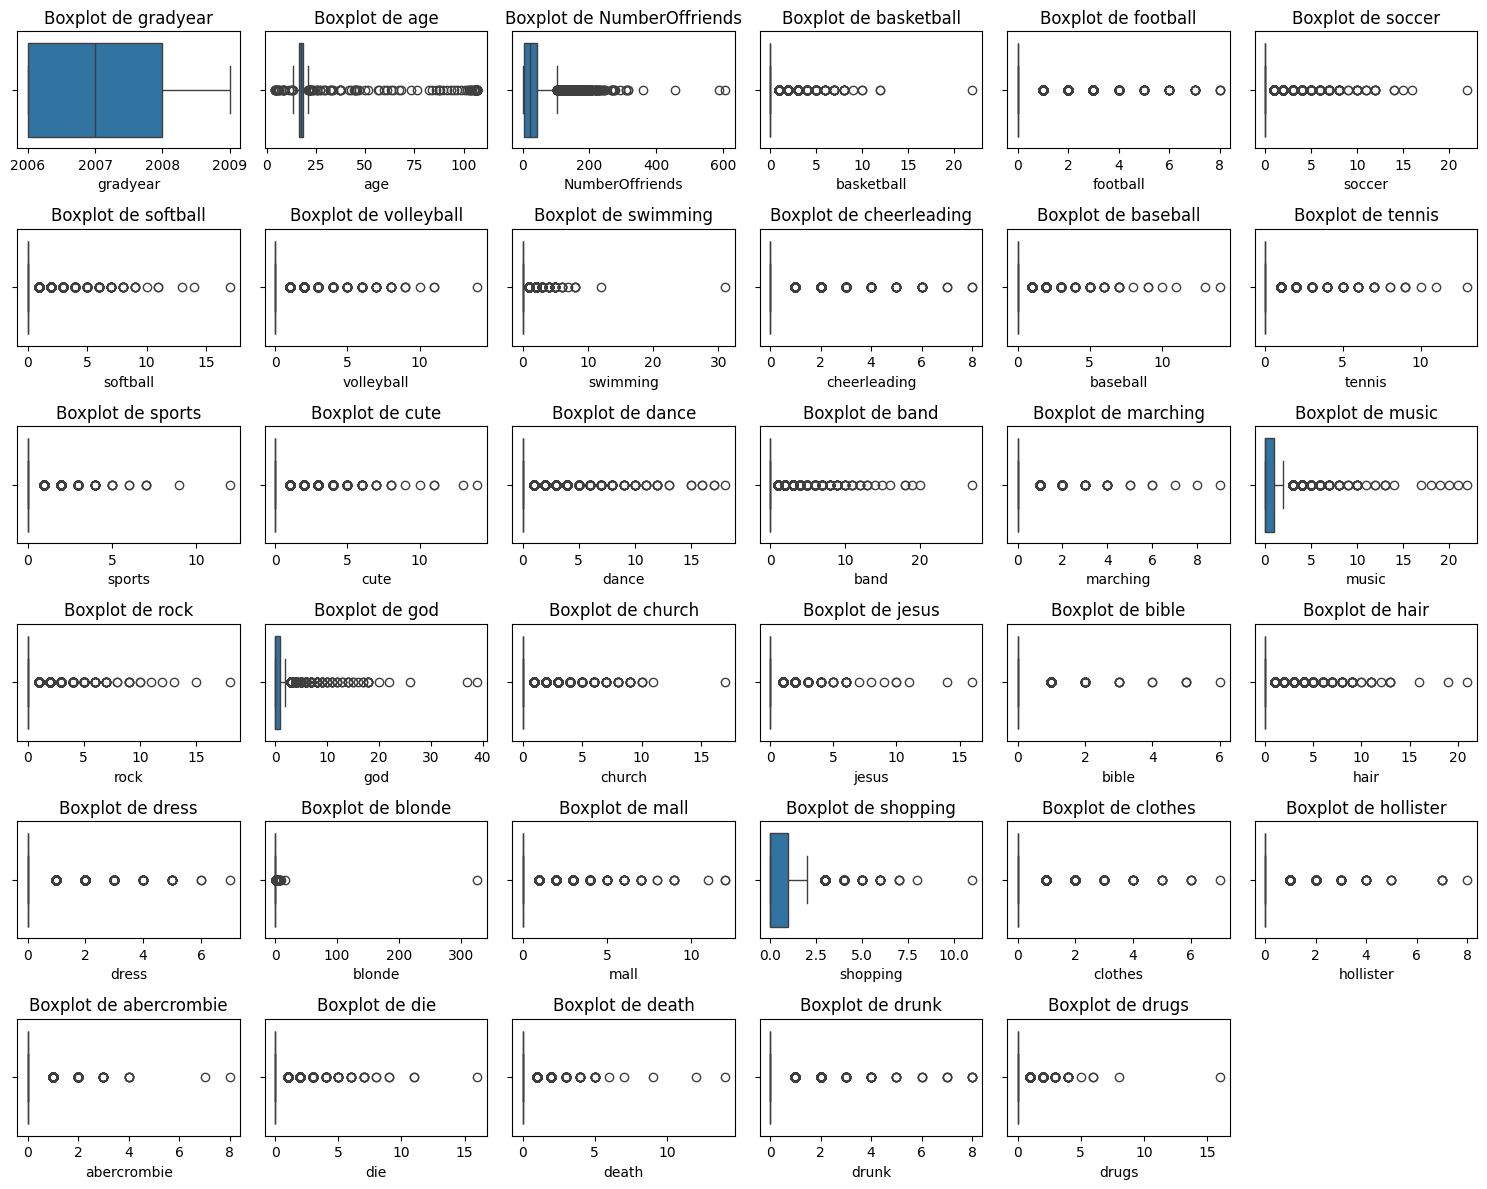

In [ ]:
# Visualisation des outliers pour les variables numériques
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(6, 6, i)  # Affichage dans une grille 5x5
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()
